# <center> Marchés à carnets d'ordres <center/> 

---
---

In [ ]:
import sys
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns+

In [ ]:
# Import de nos drive pour les fichiers
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os import walk

mypath = '/content/drive/MyDrive/Centrale Supelec/LOB/DataTp/' ## Laurent Path 
#mypath = '/content/drive/MyDrive/Colab Notebooks Centrale/LOB/data' ## Antoine path 
# mypath = '/content/drive/MyDrive/Centrale Supelec/LOB/DataTp/' ## Ilyes path 
os.chdir(mypath)
!pwd

_, _, filenames = next(walk(mypath))
print(filenames)

/content/drive/MyDrive/Centrale Supelec/LOB/DataTp
['2015-06-03-BNPP.PA-book.csv.gz', '2015-06-03-BNPP.PA-trade.csv.gz', '2015-06-04-BNPP.PA-trade.csv.gz', '2015-06-05-BNPP.PA-book.csv.gz', '2015-06-04-BNPP.PA-book.csv.gz', '2015-06-08-BNPP.PA-trade.csv.gz', '2015-06-08-BNPP.PA-book.csv.gz', '2015-06-05-BNPP.PA-trade.csv.gz', '2015-06-09-BNPP.PA-trade.csv.gz', '2015-06-09-BNPP.PA-book.csv.gz', '2015-06-10-BNPP.PA-book.csv.gz', '2015-06-11-BNPP.PA-trade.csv.gz', '2015-06-11-BNPP.PA-book.csv.gz', '2015-06-10-BNPP.PA-trade.csv.gz', '2015-06-12-BNPP.PA-book.csv.gz', '2015-06-12-BNPP.PA-trade.csv.gz', '2015-06-15-BNPP.PA-trade.csv.gz', '2015-06-15-BNPP.PA-book.csv.gz', '2015-06-16-BNPP.PA-book.csv.gz', '2015-06-16-BNPP.PA-trade.csv.gz', '2015-06-17-BNPP.PA-trade.csv.gz', '2015-06-17-BNPP.PA-book.csv.gz', '2015-06-18-BNPP.PA-book.csv.gz', '2015-06-18-BNPP.PA-trade.csv.gz', '2015-06-19-BNPP.PA-book.csv.gz', '2015-06-19-BNPP.PA-trade.csv.gz', '2015-06-23-BNPP.PA-trade.csv.gz', '2015-06-22-BNPP

---
# 1 Analyse d'un modèle zéro intelligence

## 1.1 - Vraisemblance d'un processus ponctuel 

Dans le but de calibrer un modéle sur une série de temps d'arrivée d'événements, on introduit la
notion de vraisemblance d'une réalisation d'un processus ponctuel N de la manière suivante : soit $0 = t_{0} <
t_{1} < t_{2} < ... < t_{N} < t_{N+1} = T$ une suite de temps dans l'intervalle $[0; T]$. On définit la vraisemblance d'une telle réalisation par : 

$$\mathcal{L}(t_{1}; ... ; t_{N}) = \prod_{i=1}^N f^* (t_{i})$$

ou la notation $f(t_{i})$ désigne la densitée de probabilitée en $t_{i}$ de l'évènement $\{ \tau \leq t \}$ conditionnellement aux
arrivées passées $t_{1};... ; t_{i-1}$, $\tau$ désignant l'instant du premier saut de N aprés $t_{i}$. On supposera que N est
simple (pas de sauts simultanés), de sorte que $\tau > t_{i-1}$.


Pour i fixé et $ t_{i-1} <  t \leq t_{i}$  on note $F^{*}$ la fonction de répartition conditionnelle:

$$ F^{*}(t) = Proba\{ \tau \leq t | t_{0}, ... , t_{i-1} \}  $$

et par conséquent: 

$$ f^{*}(t) = \frac{dF^{*}(t)}{dt}  $$





### 1.1.1 - Expression de $\mathcal{L}$

En notant $\lambda^{*}$ l'intensité d'un processus N à un temps t, $t_{i-1}$ < t 	$\leq$ $t_{i}$  conditionnellement aux arrivées passées $t_{1}$... $t_{i-1}$.

On peut définir $\lambda^{*}$ par la relation suivante :

\begin{equation}
\lambda^{*} = \lim\limits_{\delta \rightarrow 0} \frac{P( t \leq \tau \leq t + \delta | t_{0} ... t_{i-1})}{\delta}
\end{equation}

En utilisant la formule de probabilité conditionnelle.

\begin{equation}
P( t \leq \tau \leq t + \delta | t_{0} ... t_{i-1}) = \frac{P( t \leq \tau \leq t + \delta )}{P( \tau > t | t_{0} ... t_{i-1})}
\end{equation}

Le numérateur correspond bien à la densité de probabilité tandis que le dénominateur correspond à $1 - F^{*}$ où $F^{*}$ est la fonction de répartition.

En combinant ces deux équations on a bien :
\begin{equation}
    \lambda^{*}(t) = \frac{f^{*}(t)}{1 -F^{*}(t)}
\end{equation}

On peut ensuite calculer la fonction de vraisemblance. Sachant que la densité de probabilité est la dérivée de la fonction de répartition, on a :

\begin{equation}
    \lambda^{*}(t) = \frac{dF^{*}}{dt(1 -F^{*}(t))}
\end{equation}

Puis on intègre à droite et à gauche de l'égalité 

\begin{equation}
\\ \int_{t_{i-1}}^{t}\lambda^{*}(s)ds = \int_{F^{*}(t_{i-1})}^{F^{*}(t)}\frac{dF^{*}}{1-F^{*}}
\\ \int_{t_{i-1}}^{t}\lambda^{*}(s)ds = -ln(1-F^{*}(t))
\end{equation}

Finalement en passant à l'exponentielle on a 
\begin{equation}
\\ F^{*}(t) = 1 - \exp^{-\int_{t_{i-1}}^{t}\lambda^{*}(s)ds} 
\end{equation}

Et donc la densité de probabilité conditionnelle vaut \begin{equation}
\\ f^{*}(t) =  \lambda^{*}(t)\exp^{-\int_{t_{i-1}}^{t}\lambda^{*}(s)ds} 
\end{equation}

Or d'après la formule de la vraisemblance on a :
\begin{equation}
\\ \mathcal{L}(t_{1},...,t_{N}) = \prod_{i=1}^{N} f^{*}(t_{i})
\end{equation}

D'où : 

\begin{equation}
\\ \mathcal{L}(t_{1},...,t_{N}) = \prod_{i=1}^{N}( \lambda^{}(t_{i})\exp^{-\int_{t_{i-1}}^{t_{i}}\lambda^{}(s)ds} ) = (\prod_{i=1}^{N} \lambda^{}(t_{i})) \exp^{-\int_{0}^{T}\lambda^{}(s)ds}
\end{equation}

###1.1.2 - Cas d'un processus de Poisson homogène 



On considère $\lambda$ comme une constante donc la vraisemblance devient :

\begin{equation}
    \mathcal{L}(t_1, ... t_N) = \prod_{i=1}^N f^{*}(t_i) = (\prod_{i=1}^N \lambda^{*}(t_i)) \exp(-\int_{0}^{T} \lambda^{*}(s)ds) = \lambda^{N}\exp(-T\lambda)
\end{equation}

On peut calculer le maximum de vraisemblance en calculant la valeur de $\lambda$ annulant la dérivée de la vraisemblance 

\begin{equation}
    \frac{d\mathcal{L}(t_1, ... t_N)}{d\lambda} =  N\lambda^{N-1}\exp(-T\lambda) - T\lambda^{N}\exp(-T\lambda) 
\end{equation}

La valeur $\overline{\lambda}$ annulant cette dérivée et par conséquent maximisant la vraisemblance est :

\begin{equation}
  \overline{\lambda} = \frac{N}{T}
\end{equation}



# 1.2 - Analyse de données de carnets d'ordres

#### Reformatage des données: 

- On récupère tous les datas frames correspondant aux fichiers "tradesQuotes" et "orderbook"

In [ ]:
def getData(filenames):
  data = {}
  for name in tqdm(filenames):
    data[name.split(".")[0]] = pd.read_csv(name, compression='gzip', index_col=0)
  return data

List_book = list(filter(lambda filenames: "book" in filenames, filenames))
List_Trade = list(filter(lambda filenames: "trade" in filenames, filenames))

Data_book = getData(List_book)
Data_trade = getData(List_Trade)

- On change le format date xltime à un format date normal (pour les fichiers book on ne garde qu'un seul jour : 10 Juin)

In [ ]:
# Pour tous les fichiers trades
for df_name, df in Data_trade.items():
  df.index = pd.to_datetime(df.index,unit="d",origin="1899-12-30",utc=True)
  df.index = df.index.tz_convert('Europe/Paris')
  Data_trade[df_name] = df

In [ ]:
# Pour le 10 Juin des fichiers Book
data_book = Data_book['2015-06-10-BNPP'].copy()
data_book.index = pd.to_datetime(data_book.index,unit="d",origin="1899-12-30",utc=True)
data_book.index = data_book.index.tz_convert('Europe/Paris')

# Les colonnes doivent être shiftés
data_book = data_book.shift(1, axis="columns")
data_book.drop(columns="Unnamed: 1", axis=1, inplace=True)

## 1.2.1 - Fichiers "tradesQuotes"

- On a vu en partie $1$ que l'intensité $\lambda$ maximisant la vraisemblance est $\bar{\lambda} = \frac{N}{T}$ avec $T$ en secondes.
  - Donc par exemple entre $10h$ et $16h$, $T = 6*3600 = 21600$ car $6h$ pour $1h = 3600s$.

In [ ]:
T6h = 21600
T2h = 7200
range_hours = [("10:00","16:00", T6h), ("10:00","12:00", T2h), ("12:00","14:00", T2h), ("14:00","16:00", T2h)]

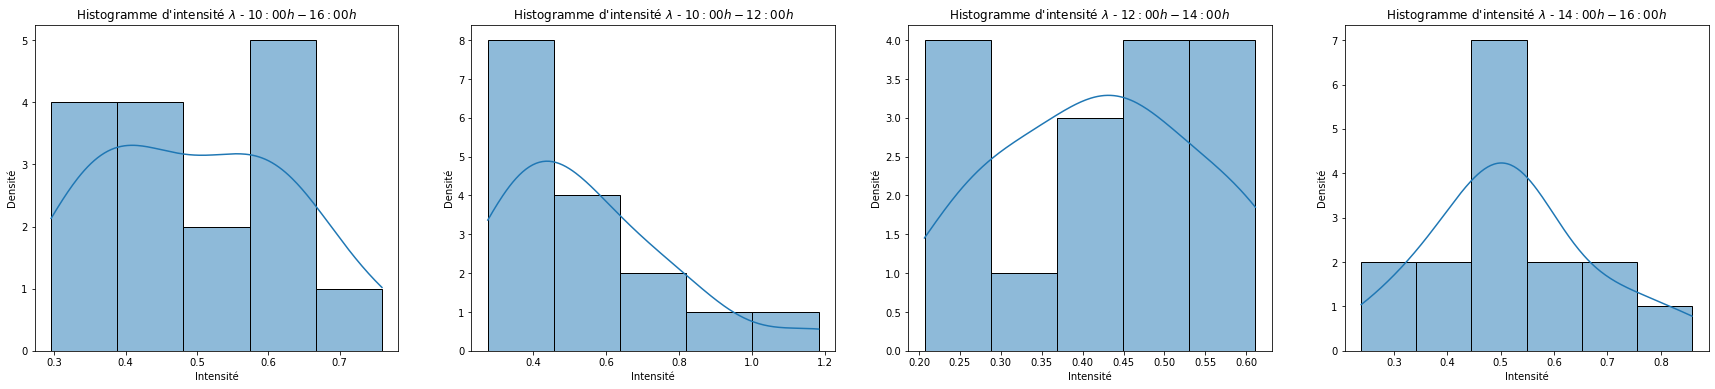

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(30,6))

for i, range_hour in enumerate(range_hours):
  lambda_val = []
  for df in Data_trade.values():
    data = df.copy() # Pour pas que la modification soit effectuée directement dans le dictionnaire
    data = data.between_time(range_hour[0], range_hour[1])
    lambda_val.append(len(data)/range_hour[2])
  ax[i].set(title=f"Histogramme d'intensité $\lambda$ - ${range_hour[0]}h-{range_hour[1]}h$", xlabel="Intensité", ylabel="Densité")
  sns.histplot(lambda_val, kde=True, ax=ax[i]);

- Pour $10h-16h$:
  - On voit que la plus grande intensité est de $0.6s^{-1}$ à peu près, ce qui correspond à $\frac{1}{0.6} = 1.66$ transactions par seconde. Ce qui donne $13500$ transactions entre $10h$ et $16h$, ce qui est cohérent avec le fait qu'il y a environ $10 000$ transactions par jour pour les actifs liquides.

- En comparant les autres plages horaires, on voit que :
  - Pour $10h-12h$, l'intensité la plus fréquente est d'environ $0.4$ et sinon l'intensité augmente inverement proportionnellement à la fréquence,
  - Pour $12h-14h$, on remarque de plus faibles intensité réparties de manière plus régulière, cela vient fait que l'activité est réduite lors du déjeuner,
  - Pour $14h-16h$, l'intensité la plus fréquente est d'environ $0.5$, ce qui est supérieur en général du fait de la plus grande activité due à l'ouverture du marché US.

- Note : Les histogrammes étant réalisés sur 16 jours, cela ne représente beaucoup de données et ne permet pas d'établir des conclusions robustes.

## Calibration sur intervalles de $5min$

In [ ]:
lambda_val = []
for i, df in enumerate(list(Data_trade.values())):
  data = df.copy() # Pour pas que la modification soit effectuée directement dans le dictionnaire
  lambda_val.append(data.between_time("10:00", "16:00").resample("5min").count()["trade-price"].values / (5*60))
lambda_val = np.array(lambda_val)

# Moyenne des 16 fichiers pour chaque intervalle de 5min 
lambda_val_mean = lambda_val.mean(axis=0)

# Reformattage en pandas pour le plot                   # on en prend un au hasard pour l'index
lambda_val_mean_df = pd.DataFrame(lambda_val_mean, index=Data_trade["2015-06-03-BNPP"].between_time("10:00", "16:00").resample("5min").count().index)

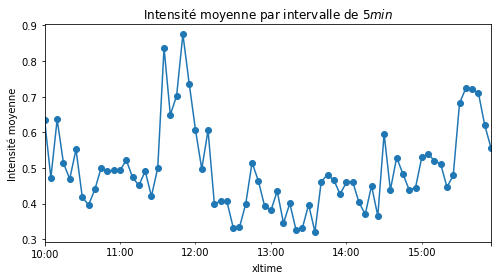

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set(title="Intensité moyenne par intervalle de $5min$", xlabel="Temps", ylabel="Intensité moyenne")
lambda_val_mean_df.plot(legend=False, figsize=(8,4), marker="o", ax=ax);

- Nous avons donc le processus de Poisson inhomogène variant au cours de la journée $\lambda(t)$, calibrée sur les données en faisant la moyenne des intensités sur intervalles de $5min$ pour les $16$ jours de données fournis.

## 1.2.2 - Fichiers "orderbook"

- Nous nous intéressons donc seulement au $10$ Juin ici

- On calcule le $\lambda$ sur $10h-16h$ afin de le comparer avec le précédent. 

- Puis nous allons calculer de même l'intensité sur intervalles de $5min$ afin de comparer

In [ ]:
data_book = data_book.between_time("10:00", "16:00")

In [ ]:
# Lambda entre 10h et 16h
print(f"Le lambda entre 10h et 16h est de {np.round(len(data_book)/T6h, 3)}")

Le lambda entre 10h et 16h est de 22.169


- On a donc un facteur $50$ entre le $\lambda$ du fichier de l'order book et celui des trades. Cela s'explique par le fait qu'il y a beaucoup plus d'ordres (limites, annulations) dans le fichier "orderbook", alors qu'il y a seulement les transactions dans les fichiers précédents "trades".

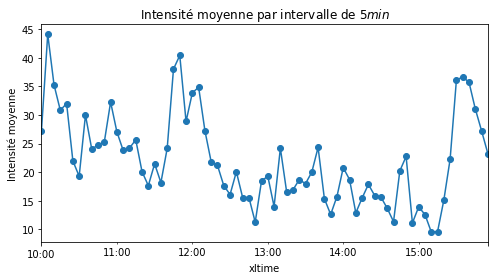

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set(title="Intensité moyenne par intervalle de $5min$", xlabel="Temps", ylabel="Intensité moyenne")
pd.DataFrame(data_book.resample("5min").count().iloc[:,0].values / (5*60), index=data_book.between_time("10:00", "16:00").resample("5min").count().index).plot(legend=False, figsize=(8,4), marker="o", ax=ax);

- On retrouve a peu près la même shape que dans le cas précédent, même si à $10h$ nous avons désormais un pic qui n'était pas présent dans le cas précédent, pouvant venir du fait qu'à l'ouverture, certains traders placent des ordres limites/annulations pour leur stratégie haute-fréquence.
  - En fait, nous voyons un pic vers l'ouverture ($10h$), un pic à $12h$, et un troisième vers la fermeture ($16h$).

- Et on voit également que l'intensité est plus importante d'un facteur $50$ environ, comme dit plus haut.

---
# 2 - Simulation d'un processus de Poisson inhomogène et d'un processus de Hawkes

## 2.1 - Simulation d'un processus de Poisson inhomogène

### 2.1.1 - Le résultat théorique

VOIR SI ON RECOPIE LE THEOREM

- On utilise l'algorithme dit de *thinning* pour simuler le processus de Poisson inhomogène.

### 2.1.2 - L'algorithme de Lewis et Shedler pour un processus inhomogène

- Implémentation de l'algorithme

In [ ]:
def lewis_shedler(nb_sim, T, lambda_star):
  simulation = []
  for n in range(nb_sim):
      t = 0
      traj = [0]
      while t < T:
          U = np.random.uniform()
          t -= np.log(U)/lambda_star
          P = np.random.uniform()
          lambd = 10*((t-0.5)**2+1)
          if lambd >= P*lambda_star:
            traj.append(t)
      simulation.append(traj)
  return simulation

- On va simuler $1000$ trajectoires d'un processus de Poisson inhomogène, d'intensité déterministe $\lambda(t)=10((t-\frac{1}{2})^2+1)$ sur $[0,1]$.

- Pour le majorant $\lambda^{*}$, nous allons faire une étude de fonction afin d'en prendre un strictement supérieur au maximum de la fonction (le majorant doit être strictement supérieur)

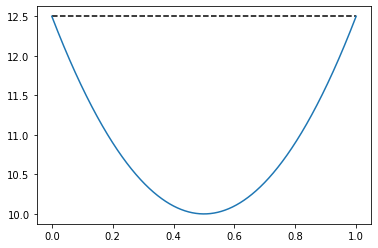

In [ ]:
# Trouver lambda_star
x = np.linspace(0,1,10000)
y = 10*((x-0.5)**2+1)
plt.plot(x, y)
plt.hlines(max(y), 0, 1, linestyle="--");

- On a donc un maximum de $12.5$, on aura donc $\lambda^{*} = 12.6$. Car plus notre majorant est proche du maximum, plus la convergence sera rapide.

In [ ]:
# Paramètres
nb_sim = 1000
T = 1
lambda_star = 12.6

# On réalise les 1000 simulations
simu = lewis_shedler(nb_sim, T, lambda_star)

- On rappelle que pour le maximum de vraisemblance nous avons $\bar{\lambda} = \frac{N}{T}$ avec $T=1$, donc $\bar{\lambda} = N$ ici.

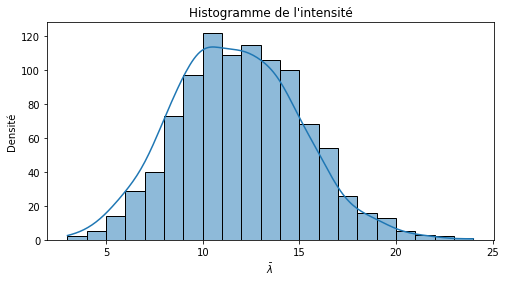

In [ ]:
# Méthode du maximum de vraisemblance pour les lambda de chaque trajectoire
fig, ax = plt.subplots(figsize=(8,4))
ax.set(title="Histogramme de l'intensité", xlabel=r"$\bar{\lambda}$", ylabel="Densité")
intensite = np.array([len(traj)-1 for traj in simu]) # -1 car on commence à 0
sns.histplot(intensite, kde=True, ax=ax);

- La distribution empirique des intensités (supposées constantes) permet de voir une intensité plus fréquente aux alentours de $12$. On peut dire de par le TCL qu'il y aura pour la distribution empirique convergence asymptotique vers une gaussienne. En effet nous affichons l'espérance sur $[0,T]$.

Changement de temps :

On peut appliquer le théorème de changement de temps vu en cours. Cela consiste à définir $\tau_{i}$ pour $t$ entre [$T_{i-1}$,$T_{i}$]  par la relation suivante :

\begin{equation}
    \tau_{i} =  \int_{T_{i-1}}^{T_{i}} \lambda(u) du
\end{equation}

Si on applique cette formule à processus d'intensité $\lambda$ on obtient pour tout i :

\begin{equation}
    \tau_{i} =  \int_{T_{i-1}}^{T_{i}} 10( (u - \frac{1}{2})^{2} + 1) du
\end{equation}

On obtient donc 

\begin{equation}
  \tau_{i} = \frac{10}{3}( T_{i+1}^{3} - T_{i}^{3}) + 5( T_{i+1}^{2} - T_{i}^{2}) + \frac{25}{2}(T_{i+1} - T_{i})
\end{equation}

On simule ensuite :
\begin{equation}
  T_{i+1} = f(T_{i},\tau_{i}) 
\end{equation}

où f est la fonction inverse de $\lambda$



## 2.2 - Simulation d'un processus de Hawkes

- Nous allons simuler un processus de Hawkes unidimensionnel $N$ avec un noyau exponentiel, dont l'intensité vérifie :


$$\lambda(t) = \lambda_0 + \int_{0}^{t}\alpha e^{-\beta(t-s)}\mathrm{d}N(s) = \lambda_0 + \sum_{t_i < t}\alpha e^{-\beta(t-t_i)}$$

- Où les $t_i$ sont les temps de saut de $N$.

### 2.2.1 - Modification de l'algorithme de Lewis et Shedler

- Nous utilisons le même algorithme que précédement mais adapté pour les processus de Hawkes.
  - Cela signifie de ne pas prendre en compte de bornes sur l'intensité d'une trajectoire.
  - L'algorithme est complété par la mise à jour de l'intensité maximale $\lambda{*}$ à chaque date générée par l'algorithme (qui est initialisée à la valeur $\lambda_0 + \alpha$.

- L'algorithme aura en sortie les temps de sauts ainsi que les intensités à ces temps. 

In [ ]:
def Hawkes(nb_sim, lambda0, alpha, beta, T):
    simulation=[]
    for n in range(nb_sim):
        t = 0
        lambda_star = lambda0 + alpha
        lambd = lambda0
        traj = [(0,lambda_star)]
        while t < T:
          U = np.random.uniform()
          t -= np.log(U)/lambda_star
          P = np.random.uniform()
          # Intensité selon un processus de Hawkes
          lambd = lambda0 + alpha*np.sum([np.exp(-beta*(t-ti)) for ti in np.array(traj)[:,0]]) 
          if lambd >= P*lambda_star:
              traj.append((t,lambd))
          # On met à jour le alpha
          lambda_star += alpha
        simulation.append(traj)
    return simulation

### 2.2.2 Application Numérique

- On simule $1000$ trajectoires d'un processus de Hawkes et de son intensité avec $\lambda_0 = 10$ et $\alpha = 1$ pour :
  - $\beta = 2$
  - $\beta = 4$
  - $\beta = 8$

In [ ]:
lambda0 = 10
alpha = 1
betas = [2,4,8]
N = 1000
T = 1

In [ ]:
simu = Hawkes(N, lambda0, alpha, 2, T)

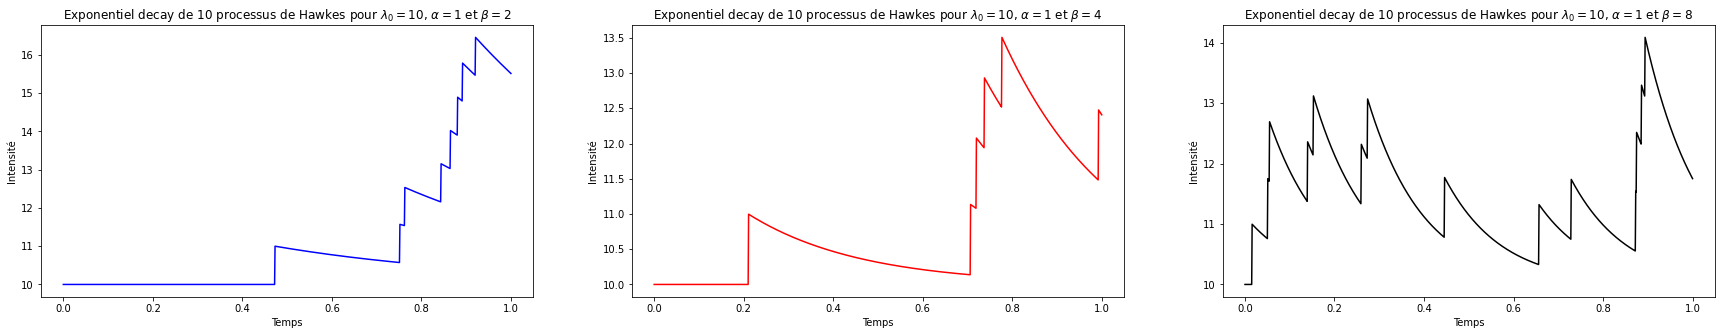

In [ ]:
# Affichage d'un processus
fig, ax = plt.subplots(1, len(betas), figsize=(30,5))
for i, beta in enumerate(betas):
  ax[i].set(title=r"Exponentiel decay de 10 processus de Hawkes pour $\lambda_0 = 10$, $\alpha = 1$ et $\beta = $"+f"{beta}", xlabel="Temps", ylabel="Intensité")
  simu = Hawkes(N, lambda0, alpha, beta, T)
  t = np.array(simu[0])[:,0]
  lambdas = np.array(simu[0])[:,1]

  color_list = ['blue','red','black','green']

  grid_finesse = 1000
  grid = np.arange(grid_finesse+1) / grid_finesse
  n = len(betas)

  intensity = np.zeros(grid_finesse+1) + lambda0
  for j in range(1, grid_finesse+1):
      intensity[j] += alpha * np.sum(np.exp(- betas[i] * (grid[j] - t[1:][t[1:] < grid[j]])))
  ax[i].plot(grid,intensity,label = 'beta = {}'.format(betas[i]), color = color_list[i])

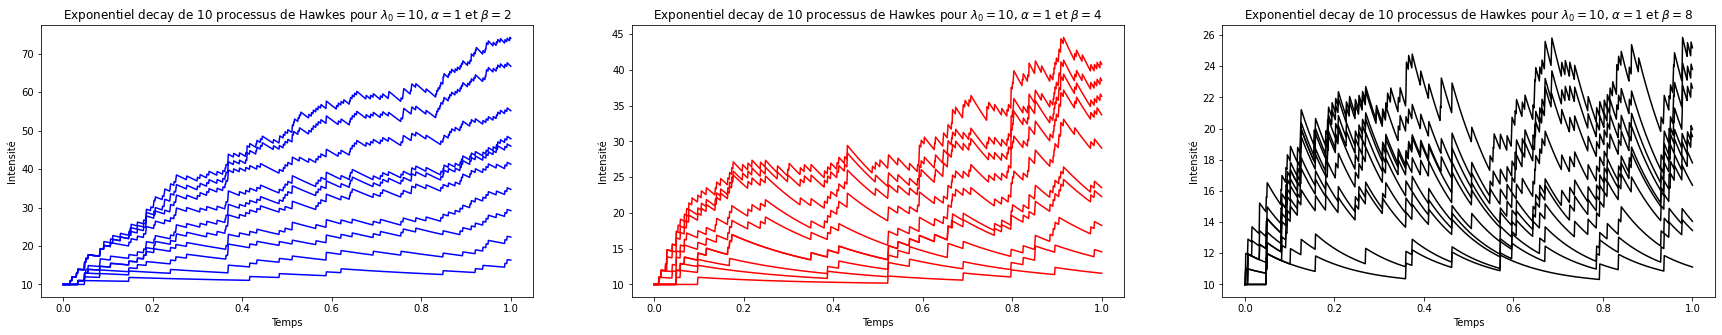

In [ ]:
# Plusieurs processus
fig, ax = plt.subplots(1, len(betas), figsize=(30,5))
color_list = ['blue','red','black','green']
grid_finesse = 1000
grid = np.arange(grid_finesse+1) / grid_finesse

for j, beta in enumerate(betas):
  ax[j].set(title=r"Exponentiel decay de 10 processus de Hawkes pour $\lambda_0 = 10$, $\alpha = 1$ et $\beta = $"+f"{beta}", xlabel="Temps", ylabel="Intensité")
  simu = Hawkes(N, lambda0, alpha, beta, T)
  intensity = np.zeros(grid_finesse+1) + lambda0
  for k in range(10):
    t = np.array(simu[k])[:,0]
    lambdas = np.array(simu[k])[:,1]
    for i in range(1, grid_finesse+1):
        intensity[i] += alpha * np.sum(np.exp(- beta * (grid[i] - t[1:][t[1:] < grid[i]])))
    ax[j].plot(grid,intensity,label = 'beta = {}'.format(beta), color = color_list[j])

- On remarque que quand on augmente le $\beta$, les sauts ont moins d'influence et on tend rapidement vers le $\lambda_0$ (l'exponentielle étant décroissante de coefficient $\beta$).

- On remarque que comme nous n'avons processus continu, nous ne pouvons pas voir la décroissance exponentielle entre deux événements (d'autant plus importante lorsque $\beta$ augmente), mais nous avons une droite linéaire reliant deux points correspondant aux sauts.

#### Cas $\beta = 2$

- Ici on s'intéresse au premier cas $\beta = 2$

- On détermine l'intensité du processus de Poisson homogène qui représenterait le mieux ces trajectoires. 

- Puis nous simulerons les trajectoires de ce processus et allons les comparer qualitativement avec celles du processus de Hawkes.

In [ ]:
beta = 2
T = 1
simu = Hawkes(N, lambda0, alpha, beta, T)
intensite = np.array([len(traj)-1 for traj in simu]) # -1 car on commence à 0

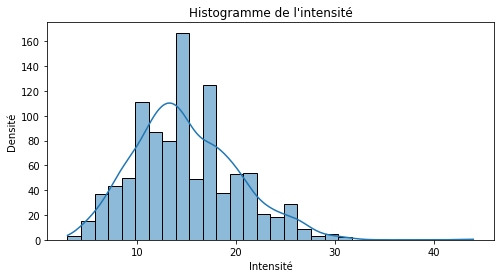

In [ ]:
# Méthode du maximum de vraisemblance pour les lambda de chaque trajectoire
fig, ax = plt.subplots(figsize=(8,4))
ax.set(title="Histogramme de l'intensité", xlabel="Intensité", ylabel="Densité")
sns.histplot(intensite, kde=True, ax=ax);

- Tracons donc les intensités de processsus de Poisson homogènes représantant le mieux les trajectoires des processus de Hawkes calculées ($\beta = 2$)

- Pour le processus de Hawkes, on a $$\mathbb{E}[\lambda(t)] = \frac{\lambda_0}{1 - \frac{\alpha}{\beta}} = 20 $$
  - Nous allons donc comparer les processus de Hawkes avec des processus de Poissons homogènes d'intensité $20$.

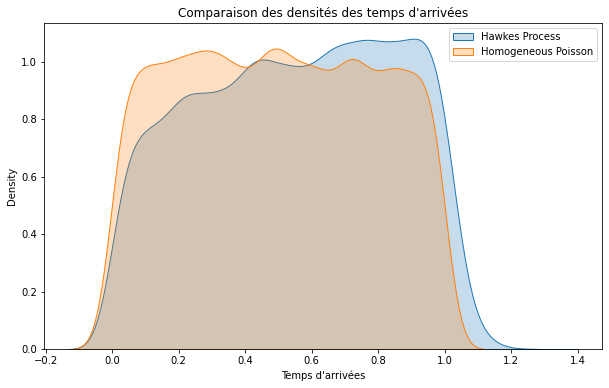

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,6))
ax.set(title="Comparaison des densités des temps d'arrivées", xlabel="Temps d'arrivées")
# ax[1].set(title="Comparaison des densités des temps d'inter-arrivées", xlabel="Temps d'inter-arrivées")
N_comp = 20

# Temps d'arrivée
hawkes_all_traj = [np.array(traj)[1:,0] for traj in simu]
poissons_homog_traj = [np.random.uniform(size=N_comp) for i in range(len(simu))]
hawkes_all = np.concatenate(([events for events in hawkes_all_traj]))
poissons_homog = np.concatenate(([events for events in poissons_homog_traj]))
sns.kdeplot(hawkes_all, label='Hawkes Process', ax=ax, fill=True)
sns.kdeplot(poissons_homog, label='Homogeneous Poisson', ax=ax, fill=True)
ax.legend();

- On a donc bien une distribution uniforme pour le processus de Poisson homogène. 

- Quant à celle du processus de Hawkes, on voit que le nombre d'event augmente avec le temps, pour arriver à un maximum vers la fin de l'intervalle $[0,T]$, ce qui montre le principe d'auto-excitation propre aux processus de Hawkes.